<a href="https://colab.research.google.com/github/r-volo/r-volo.github.io/blob/main/Classification_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Supervised Classification - K nearest neighbors (kNN)

In [ ]:
from sklearn import neighbors, datasets
breastCancer = datasets.load_breast_cancer()
X, y = breastCancer.data, breastCancer.target
X.shape


(569, 30)

In [ ]:
# create the model
knn = neighbors.KNeighborsClassifier() 
# knn = neighbors.KNeighborsClassifier(n_neighbors=15) #you can specify the number of neighbors if you'd like

# fit the model
knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
breastCancer.feature_names, breastCancer.target_names

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 array(['malignant', 'benign'], dtype='<U9'))

In [ ]:
# The following attributes of a patient with Breast Cancer
result = knn.predict([[6.981, 9.71, 43.79, 143.5, 0.053, 0.019, 0.0, 0.0, 0.106, 0.05, 0.112, 0.36, 	
0.757, 6.802, 0.002, 0.002, 0.0, 0.0, 0.008, 0.001, 7.93, 12.02, 50.41, 185.2, 0.071, 0.027, 0.0, 0.0, 0.156, 0.055]])

print(result,breastCancer.target_names[result]) # What type of tumour does the patient most likely have

[1] ['benign']


In [ ]:
from sklearn import neighbors, datasets, linear_model
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

# Create color map for the 2-class classification problem
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

def plot_breastCancer_knn():
    breastCancer = datasets.load_breast_cancer()
    X = breastCancer.data[:, 5:7]  
    y = breastCancer.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=15) #Try changing the number of neighbors
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('mean smoothness')
    pl.ylabel('mean concavity')
    pl.axis('tight')

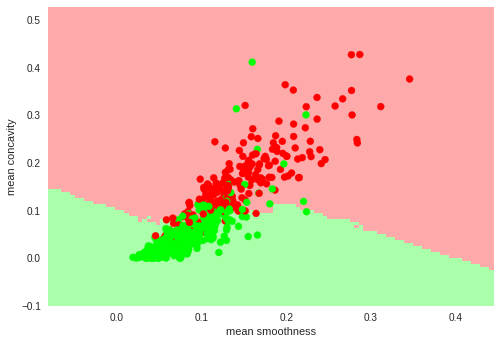

In [ ]:
plot_breastCancer_knn() 

In [ ]:
# There is a lot of overlap. The classification isn't distinct.

Dimensionality Reduction - Principle Component Analysis (PCA)

In [ ]:
X, y = breastCancer.data, breastCancer.target

from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
pca.fit(X)
X_reduced = pca.transform(X) 
print("Original dataset shape:",X.shape, "Reduced dataset shape:", X_reduced.shape)

Original dataset shape: (569, 30) Reduced dataset shape: (569, 2)


In [ ]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
pd.DataFrame(X_reduced,y) # reduce 30 dimensions to 2 and change the form to capture the classifications 0|1.

,0,1
0,1160.142574,-293.917544
0,1269.122443,15.630182
0,995.793889,39.156743
0,-407.180803,-67.380320
0,930.341180,189.340742
...,...,...
0,1414.126684,110.222492
0,1045.018854,77.057589
0,314.501756,47.553525
0,1124.858115,34.129225


In [ ]:
print(y) # only two catagories

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
pca.components_

array([[ 5.08623202e-03,  2.19657026e-03,  3.50763298e-02,
         5.16826469e-01,  4.23694535e-06,  4.05260047e-05,
         8.19399539e-05,  4.77807775e-05,  7.07804332e-06,
        -2.62155251e-06,  3.13742507e-04, -6.50984008e-05,
         2.23634150e-03,  5.57271669e-02, -8.05646029e-07,
         5.51918197e-06,  8.87094462e-06,  3.27915009e-06,
        -1.24101836e-06, -8.54530832e-08,  7.15473257e-03,
         3.06736622e-03,  4.94576447e-02,  8.52063392e-01,
         6.42005481e-06,  1.01275937e-04,  1.68928625e-04,
         7.36658178e-05,  1.78986262e-05,  1.61356159e-06],
       [ 9.28705650e-03, -2.88160658e-03,  6.27480827e-02,
         8.51823720e-01, -1.48194356e-05, -2.68862249e-06,
         7.51419574e-05,  4.63501038e-05, -2.52430431e-05,
        -1.61197148e-05, -5.38692831e-05,  3.48370414e-04,
         8.19640791e-04,  7.51112451e-03,  1.49438131e-06,
         1.27357957e-05,  2.86921009e-05,  9.36007477e-06,
         1.22647432e-05,  2.89683790e-07, -5.68673345e-

In [ ]:
print(X_reduced,y)

[[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1

0.005 x mean radius + 0.002 x mean texture + 0.035 x mean perimeter + 0.517 x mean area + 0.000 x mean smoothness + 0.000 x mean compactness + 0.000 x mean concavity + 0.000 x mean concave points + 0.000 x mean symmetry + -0.000 x mean fractal dimension + 0.000 x radius error + -0.000 x texture error + 0.002 x perimeter error + 0.056 x area error + -0.000 x smoothness error + 0.000 x compactness error + 0.000 x concavity error + 0.000 x concave points error + -0.000 x symmetry error + -0.000 x fractal dimension error + 0.007 x worst radius + 0.003 x worst texture + 0.049 x worst perimeter + 0.852 x worst area + 0.000 x worst smoothness + 0.000 x worst compactness + 0.000 x worst concavity + 0.000 x worst concave points + 0.000 x worst symmetry + 0.000 x worst fractal dimension
0.009 x mean radius + -0.003 x mean texture + 0.063 x mean perimeter + 0.852 x mean area + -0.000 x mean smoothness + -0.000 x mean compactness + 0.000 x mean concavity + 0.000 x mean concave points + -0.000 x me

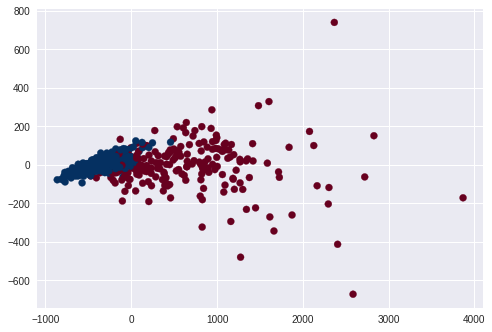

In [ ]:
import pylab as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdBu')

for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            breastCancer.feature_names)))

Get the data values out as a csv file (X and y), plot as scatter on Vegalite

In [ ]:
import pandas as pd
df = pd.DataFrame(X_reduced,y)
df2 = df.rename(columns={0:'Dimension 1', 1:'Dimension 2'})

In [ ]:
print(df2)

    Dimension 1  Dimension 2
0   1160.142574  -293.917544
0   1269.122443    15.630182
0    995.793889    39.156743
0   -407.180803   -67.380320
0    930.341180   189.340742
..          ...          ...
0   1414.126684   110.222492
0   1045.018854    77.057589
0    314.501756    47.553525
0   1124.858115    34.129225
1   -771.527622   -88.643106

[569 rows x 2 columns]


In [ ]:
df2.to_csv('exported.csv')